<a href="https://colab.research.google.com/github/YuliiaMan/python_for_ds_tasks/blob/main/Additional_hw_4_Pandas_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Додаткове завдання з pandas
Вітаю! В цьому завданні будемо працювати з даними з опитування щодо зарплат ІТ спеціалістів на рексурсі DOU від грудня 2022 року. Впевнена, це буде цікаве дослідження, а заразом і практика pandas :)
Цей аналіз може бути корисним людині, яка обирає напрям роботи в ІТ і хоче зрозуміти тенденції. За якісного виконання цього аналізу, цей проєкт можна сміливо додавати у Ваше портфоліо!

In [3]:
import pandas as pd

1. Зчитайте дані з файлу `2022_dec_raw.csv`. Увага! Тут необхідно використати аргумент `pd.read_csv` `sep=';'`, бо розділювач в даних - крапка з комою.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data_path = '/content/drive/MyDrive/datastat/2022_dec_raw.csv'
df = pd.read_csv(data_path, sep=';')

2. Які колонки мають дані?

In [ ]:
df.columns

Index(['Timestamp', 'Ви працюєте зараз в ІТ?', 'Де ви зараз живете? ',
       'В якій області ви зараз живете?',
       'Зарплата у $$$ за місяць, лише ставка після сплати податків',
       'Ваша стать', 'Ваш вік', 'Яка у вас освіта?',
       'Чи є у вас науковий ступінь? ', 'Знання англійської мови',
       'Оберіть вашу посаду', 'Ваш тайтл', 'Ваша спеціалізація',
       'Вкажіть вашу спеціалізацію', 'Оберіть вашу спеціалізацію',
       'Ваша посада', 'Оберіть вашу посаду2', 'Ваша посада3', 'Ваша посада4',
       'Ваша посада5', 'Ваша посада6', 'Ваша посада7',
       'Чи використовуєте ви у своїй роботі мови програмування (одну чи декілька)?',
       'Основна мова програмування', 'Вкажіть вашу основну спеціалізацію',
       'В якій сфері працюєте?', 'Тип компанії',
       'Загальний стаж роботи за спеціальністю'],
      dtype='object')

3. Скільки рядків та колонок мають дані? Скільки пропущених значень має кожна з колонок?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13315 entries, 0 to 13314
Data columns (total 28 columns):
 #   Column                                                                      Non-Null Count  Dtype 
---  ------                                                                      --------------  ----- 
 0   Timestamp                                                                   13315 non-null  object
 1   Ви працюєте зараз в ІТ?                                                     13315 non-null  object
 2   Де ви зараз живете?                                                         13315 non-null  object
 3   В якій області ви зараз живете?                                             11538 non-null  object
 4   Зарплата у $$$ за місяць, лише ставка після сплати податків                 13288 non-null  object
 5   Ваша стать                                                                  13315 non-null  object
 6   Ваш вік                                               

4. Які колонки мають всі значення заповненими (не мають дожного None значення)? Виведіть програмно список цих колонок.

In [ ]:
isna = df.isna().sum()

In [ ]:
isna[isna==0].index

Index(['Timestamp', 'Ви працюєте зараз в ІТ?', 'Де ви зараз живете? ',
       'Ваша стать', 'Ваш вік', 'Яка у вас освіта?', 'Знання англійської мови',
       'Оберіть вашу посаду', 'Ваш тайтл', 'В якій сфері працюєте?',
       'Тип компанії', 'Загальний стаж роботи за спеціальністю'],
      dtype='object')

5. Який тип мають колонки в наборі даних? Які з колонок типу object логічно на ваш погляд перетворити на числові колонки?

In [ ]:
df.dtypes

Timestamp                                                                      object
Ви працюєте зараз в ІТ?                                                        object
Де ви зараз живете?                                                            object
В якій області ви зараз живете?                                                object
Зарплата у $$$ за місяць, лише ставка після сплати податків                   float64
Ваша стать                                                                     object
Ваш вік                                                                       float64
Яка у вас освіта?                                                              object
Чи є у вас науковий ступінь?                                                   object
Знання англійської мови                                                        object
Оберіть вашу посаду                                                            object
Ваш тайтл                                             

6. Трансформуйте колонки 'Ваш вік', 'Зарплата у $$$ за місяць, лише ставка після сплати податків' у тип даних float. УВАГА! Перед трансформацією подивіться, які дані містять ці колонки. Аби успішно трансформувати тип даних, треба спочатку привести рядки до того виду, який буде підходити, аби потім рядок зробити типом float.

In [ ]:
number_cols = ['Ваш вік', 'Зарплата у $$$ за місяць, лише ставка після сплати податків']
for c in number_cols:
    df[c] = df[c].str.replace(',', '.')
    df[c] = df[c].astype(float)

7. Це завдання з зірочкою! Нам треба транфсформувати колонку Timestamp у тип даних `datetime64[ns]`. Це не так просто як здається на першйий погляд :) Але це реальна ситуація, яка може трапитись при зборі даних в роботі аналітиком.
Я запропоную один зі способів виконати завдання, але ви можете написати по-своєму. Головне - отримати колонку - потрібного типу.
Пропоную наступний алгоритм дій:
    1. Подивитись, які дані містяться в цій колонці. Виведіть перші і останні 5 записів. Чи однаковий формат цих даних? (спойлер: ні, бо інакше все було б просто :))
    2. Нам треба враховуючи різний формат даних перетворити рядок у колонці `Timestamp` на тип `datetime64[ns]`. Як це зробити? Для перетворення рядка на `datetime64` пропоную скористатись `datetime.datetime.strptime`.
    Для цього треба імпортувати бібліотеку `datetime`. Я пропоную написати функцію для обробки кожного окремого рядка, яка враховує довжину рядка і на основі цього застосовує різний формат даних дати.
    Як прописувати формат даних можна переглянути [тут](https://www.w3schools.com/python/python_datetime.asp).
    3. Коли функція для обробки кожного окремого рядка готова, застосуйте її для всіх даних з допомогою методу `apply`.

In [ ]:
df['timestamp_len'] = df.Timestamp.str.len()

In [ ]:
import datetime

def process_timestamp(row):
    if row.timestamp_len == 16:
        return datetime.datetime.strptime(row.Timestamp, '%d.%m.%Y %H:%M')
    else:
        return datetime.datetime.strptime(row.Timestamp, '%m.%d.%Y %H:%M:%S')

In [ ]:
df['Timestamp'] = df.apply(process_timestamp, axis=1)

8. Для колонок типу даних object (які такими лишились після всіх наших трансформацій) виведіть кількість унікальних значень.

In [ ]:
df.select_dtypes('object').nunique()

Ви працюєте зараз в ІТ?                                                          5
Де ви зараз живете?                                                              2
В якій області ви зараз живете?                                                 23
Ваша стать                                                                       2
Яка у вас освіта?                                                                5
Чи є у вас науковий ступінь?                                                     3
Знання англійської мови                                                          5
Оберіть вашу посаду                                                             22
Ваш тайтл                                                                       10
Ваша спеціалізація                                                               8
Вкажіть вашу спеціалізацію                                                       4
Оберіть вашу спеціалізацію                                                      21
Ваша

9. Для колонок типу даних object виведіть топ 10 найбільш частих значень з кількістю рядків, в яких це значення зустрічається. Зробіть це для кожної колонки окремо. Наприклад, в циклі.  
Що цікавого бачите? Які висновки можна зробити? Що особисто Вас вразило?

In [ ]:
object_dtypes = df.select_dtypes('object').columns

In [ ]:
for c in object_dtypes:
    display(df[c].value_counts().sort_values(ascending=False).head(10))

Так, працюю full-time      12643
Ні, тимчасово не працюю      380
Так, працюю part-time        152
Так, я фрилансер             115
Інше                          25
Name: Ви працюєте зараз в ІТ?, dtype: int64

В Україні                                                      11587
За кордоном (переїхали через війну, але планую повернутися)     1728
Name: Де ви зараз живете? , dtype: int64

Київ чи область                4411
Львів чи область               2353
Дніпро чи область               751
Івано-Франківськ чи область     478
Вінниця чи область              447
Одеса чи область                443
Харків чи область               355
Полтава чи область              252
Черкаси чи область              232
Хмельницький чи область         230
Name: В якій області ви зараз живете?, dtype: int64

Чоловік    10221
Жінка       3094
Name: Ваша стать, dtype: int64

Вища (бакалавр, спеціаліст, магістр)    10645
Дві вищі                                 1002
Ще студент вишу                           811
Середня                                   447
Середня спеціальна                        410
Name: Яка у вас освіта?, dtype: int64

Немає                  12980
Кандидат наук / PhD      216
Доктор наук                8
Name: Чи є у вас науковий ступінь? , dtype: int64

Upper-Intermediate    5538
Intermediate          4475
Advanced              1622
Pre-Intermediate      1401
Elementary             279
Name: Знання англійської мови, dtype: int64

Software Engineer (Junior, Middle, Senior, Team/Tech Lead, Architect)             6773
QA Engineer (Junior, Middle, Senior, Team/Tech Lead, Manager)                     2364
Project/Product/Program Manager, Product Owner, Scrum Master, Delivery Manager     821
HR/Recruiter                                                                       560
Designer / Artist (Graphic, UX/UI, Game, Artist, Sound etc.)                       486
Analyst (Business, Data, System)                                                   485
DevOps, SRE                                                                        353
Marketing, SEO, Copywriter                                                         305
Data Science, Machine Learning, Big Data                                           288
Game Developer / Programmer                                                        160
Name: Оберіть вашу посаду, dtype: int64

Middle            4710
Senior            3400
Junior            2316
Team Lead          883
Немає тайтлу       571
Tech Lead          430
Manager            375
Head               250
Intern/Trainee     240
Architect          140
Name: Ваш тайтл, dtype: int64

Programmer                       89
Gameplay Programmer              42
Engine Programmer                 8
.NET Programmer                   6
Ul Programmer                     4
Rendering/Graphics Programmer     4
Al Programmer                     3
Інше                              3
Name: Ваша спеціалізація, dtype: int64

Manual QA         1467
Automation QA      531
General QA         354
Performance QA      12
Name: Вкажіть вашу спеціалізацію, dtype: int64

UI/UX Designer              201
Product Designer             60
3D Artist                    40
2D Artist                    35
Graphic / Video Designer     33
Game Designer                20
Designer                     15
Animator                     14
Other                        12
Web Designer                 11
Name: Оберіть вашу спеціалізацію, dtype: int64

Other                            44
Marketing Manager                44
SEO Specialist                   34
Digital Marketing Manager        33
Copywriter                       27
Chief Marketing Officer (CMO)    22
Employer Brand Manager           20
SMM Manager                      20
PR Manager                       16
Product Marketing Manager        11
Name: Ваша посада, dtype: int64

Recruiter                             201
HR Manager                            131
Talent Acquisition Manager             52
Talent Researcher/Sourcer              51
HR Director                            45
HR Business Partner                    40
People partner / Happiness manager     40
Name: Оберіть вашу посаду2, dtype: int64

Project Manager     443
Product Manager     135
Delivery Manager     88
Product Owner        67
Scrum Master         42
Program Manager      29
Business Manager     17
Name: Ваша посада3, dtype: int64

Business Analyst    289
Data Analyst        106
Product Analyst      34
System Analyst       32
BI Analyst           24
Name: Ваша посада4, dtype: int64

Data Engineer / Big Data Engineer    104
Data Scientist                        93
Machine Learning Engineer             46
Computer Vision Engineer              21
Research Engineer                     15
BI Engineer                            9
Name: Ваша посада5, dtype: int64

DevOps Engineer              325
Site Reliability Engineer     28
Name: Ваша посада6, dtype: int64

CTO                        41
Director of Engineering    33
CEO, (co-) founder         28
Program Director           14
Name: Ваша посада7, dtype: int64

Ні, не використовую    2754
Так, використовую      2120
Name: Чи використовуєте ви у своїй роботі мови програмування (одну чи декілька)?, dtype: int64

JavaScript    1695
Java          1241
Python        1190
TypeScript    1179
C# / .NET     1179
PHP            627
Kotlin         286
C++            251
Swift          221
SQL            201
Name: Основна мова програмування, dtype: int64

Back-end  розробка               2847
Full Stack розробка              1628
Front-end  розробка              1628
QA                               1079
Mobile  розробка                  665
Робота з даними, аналіз даних     558
DevOps                            308
Інше                              293
Embedded                           49
embedded                            2
Name: Вкажіть вашу основну спеціалізацію, dtype: int64

Інша                    1445
E-commerce              1243
Fintech / Banking        942
Medtech / Healthcare     547
GameDev                  449
Gambling                 352
Edtech / Education       250
Telecom                  232
Mobile                   200
Adtech / Advertising     193
Name: В якій сфері працюєте?, dtype: int64

Аутсорсингова    5593
Продуктова       4940
Аутстафінгова    1767
Стартап           539
Інша              355
Фріланс           121
Name: Тип компанії, dtype: int64

3 роки               1608
4 роки               1447
2 роки               1427
5 років              1351
1,5 року             1056
6 років               982
1 рік                 922
7 років               791
10 років              599
15 і більше років     586
Name: Загальний стаж роботи за спеціальністю, dtype: int64

10. Виведіть медіанну (медіана - це значення, менше якого є рівно 50% вибірки і більше якого є теж рівно 50% вибірки)
ЗП (Зарплата у $$$) для кожного рівня знання англійської. Які висновки можна зробити?

In [ ]:
df.groupby('Знання англійської мови')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].median()

Знання англійської мови
Advanced              3500.0
Elementary            1155.0
Intermediate          2125.0
Pre-Intermediate      1404.0
Upper-Intermediate    3300.0
Name: Зарплата у $$$ за місяць, лише ставка після сплати податків, dtype: float64

11. Є така штука як сортування значень категоріальної змінної. Нам це зараз стане в нагоді, адже рівні англійської можна посортувати.
Давайте відсотруємо рівні англ. і тайтли. Просто запустіть код нижче і проаналізуйте, що він робить.

In [6]:
df['Знання англійської мови'] = pd.Categorical(df['Знання англійської мови'],
                      categories=['Elementary','Pre-Intermediate','Intermediate','Upper-Intermediate','Advanced'],
                      ordered=True)

df['Ваш тайтл'] = pd.Categorical(df['Ваш тайтл'],
                      categories=['Intern/Trainee', 'Junior', 'Немає тайтлу', 'Middle', 'Senior', 'Tech Lead', 'Team Lead', 'Architect', 'Head', 'Manager'],
                      ordered=True)

In [7]:
df['Ваш тайтл'].unique()

['Team Lead', 'Middle', 'Junior', 'Senior', 'Tech Lead', 'Intern/Trainee', 'Немає тайтлу', 'Manager', 'Architect', 'Head']
Categories (10, object): ['Intern/Trainee' < 'Junior' < 'Немає тайтлу' < 'Middle' ... 'Team Lead' <
                          'Architect' < 'Head' < 'Manager']

12. Зробіть зводну таблицю, де стовпці - це 'Ваш тайтл', рядки - 'Знання англійської мови', а значення - медіанна ЗП. Які висновки можна зробити?
Тут ще для зручності можна зробити градієнтне забарвлення і відформатувати значення для легшого перегляду.

In [11]:
df.pivot_table(index='Знання англійської мови', columns='Ваш тайтл', values='Зарплата у $$$ за місяць, лише ставка після сплати податків', aggfunc='median').style.background_gradient().format('{:.0f}')

<ipython-input-11-651885f1638f>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='Знання англійської мови', columns='Ваш тайтл', values='Зарплата у $$$ за місяць, лише ставка після сплати податків', aggfunc='median').style.background_gradient().format('{:.0f}')


TypeError: agg function failed [how->median,dtype->object]

13. Виведіть результат методу describe() по колонцы розміру ЗП для топ 5 за частотою зустрічання в даних областей (В якій області ви зараз живете?). Зробіть висновки, де вигідніше жити з точки зору ЗП і чи суттєва різниця на Ваш погляд для прийняття рішення про переїзд?

In [ ]:
top_districts = df['В якій області ви зараз живете?'].value_counts().sort_values(ascending=False).head(5).index

In [ ]:
df[df['В якій області ви зараз живете?'].isin(top_districts)].groupby('В якій області ви зараз живете?')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].describe().style.background_gradient().format('{:.0f}')

,count,mean,std,min,25%,50%,75%,max
В якій області ви зараз живете?,,,,,,,,
Івано-Франківськ чи область,478,2705,1906,200,1200,2372,3775,12436
Вінниця чи область,447,2888,1903,100,1300,2612,4100,11675
Дніпро чи область,751,2583,1865,100,1025,2000,3600,12000
Київ чи область,4411,3142,2040,80,1500,2800,4500,16000
Львів чи область,2353,3121,2103,150,1375,2700,4500,14000


14. Як зростає зарплата з роками? Для цього нам треба відформатувати колонку "Загальний стаж роботи за спеціальністю" аналогічно до того, як ми це робили для колонки 'Знання англійської мови' і потім вивести медіанні значення для кількості років стажу.

In [ ]:
df['Загальний стаж роботи за спеціальністю'].unique()

array(['8 років', '3 роки', '4 роки', 'Пів року', '6 років', '1,5 року',
       '1 рік', '2 роки', '5 років', '10 років', 'Менше як 3 місяці',
       '11 років', '7 років', '15 і більше років', '3 місяці', '12 років',
       '9 років', '14 років', '13 років'], dtype=object)

In [10]:
df['Загальний стаж роботи за спеціальністю'] = pd.Categorical(
    df['Загальний стаж роботи за спеціальністю'],
    categories=[
        'Менше як 3 місяці', '3 місяці',  'Пів року', '1 рік', '1,5 року',
        '2 роки', '3 роки', '4 роки','5 років','6 років', '7 років',
        '8 років', '9 років', '10 років',  '11 років','12 років', '13 років', '14 років', '15 і більше років'],
    ordered=True)

In [ ]:
df.groupby('Загальний стаж роботи за спеціальністю')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].median()

Загальний стаж роботи за спеціальністю
Менше як 3 місяці     800.0
3 місяці              525.0
Пів року              700.0
1 рік                 950.0
1,5 року             1200.0
2 роки               1700.0
3 роки               2450.0
4 роки               3000.0
5 років              3500.0
6 років              4000.0
7 років              4250.0
8 років              4700.0
9 років              4500.0
10 років             4600.0
11 років             5000.0
12 років             4750.0
13 років             4500.0
14 років             5050.0
15 і більше років    4500.0
Name: Зарплата у $$$ за місяць, лише ставка після сплати податків, dtype: float64

<Axes: xlabel='Загальний стаж роботи за спеціальністю'>

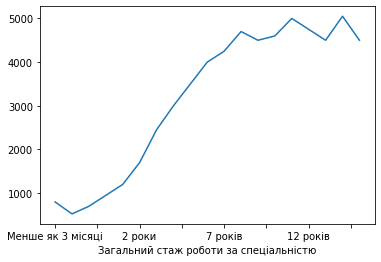

In [ ]:
# з графіка можна бачити, що після 7 років досвіду середня ЗП не дуже змінюється
df.groupby('Загальний стаж роботи за спеціальністю')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].median().plot();

Далі тут можна зробити багато аналогічних агрегацій, проаналізувати, в який час люди заповнювали форму, хто більше отримує, Business Analyst, чи Data Analyst. Я вас заохочувати не стримувати свій інтерес і покапати ці дані далі :)